In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data = np.load("./data/sdf.npz")
sdf = data['sdf'].squeeze()
gradient = data['sdf_gradient'].squeeze()
N = gradient.shape[0]
print(sdf)

[[0.6363961  0.60207975 0.57008773 ... 0.57008773 0.60207975 0.6363961 ]
 [0.60207975 0.56568545 0.5315073  ... 0.5315073  0.56568545 0.60207975]
 [0.57008773 0.5315073  0.49497476 ... 0.49497476 0.5315073  0.57008773]
 ...
 [0.57008773 0.5315073  0.49497476 ... 0.49497476 0.5315073  0.57008773]
 [0.60207975 0.56568545 0.5315073  ... 0.5315073  0.56568545 0.60207975]
 [0.6363961  0.60207975 0.57008773 ... 0.57008773 0.60207975 0.6363961 ]]


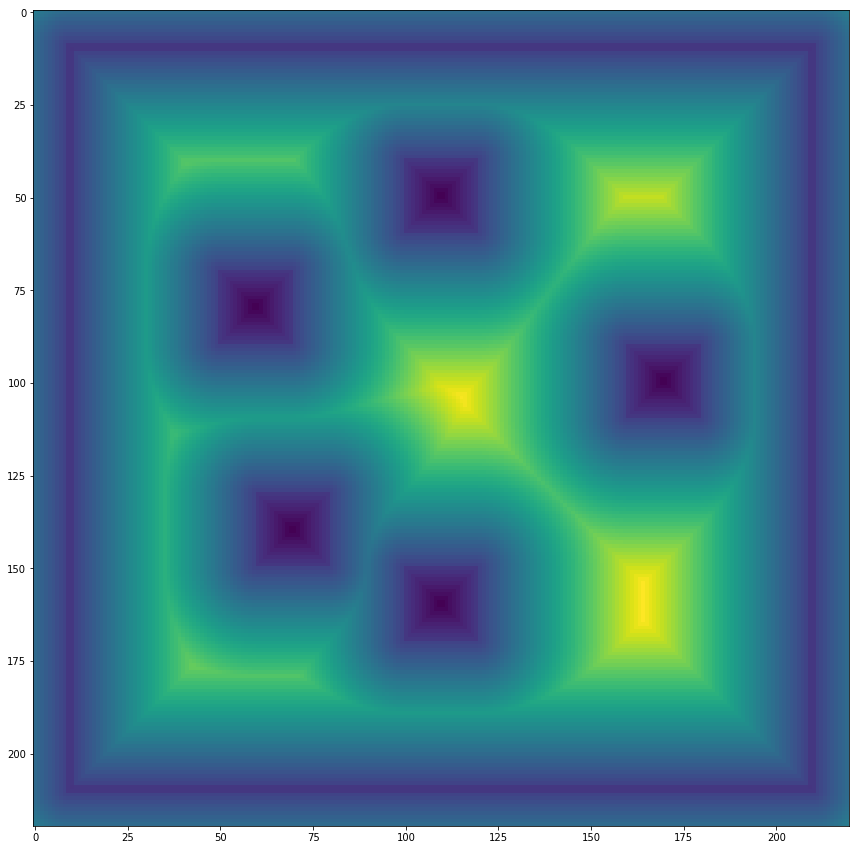

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(sdf)

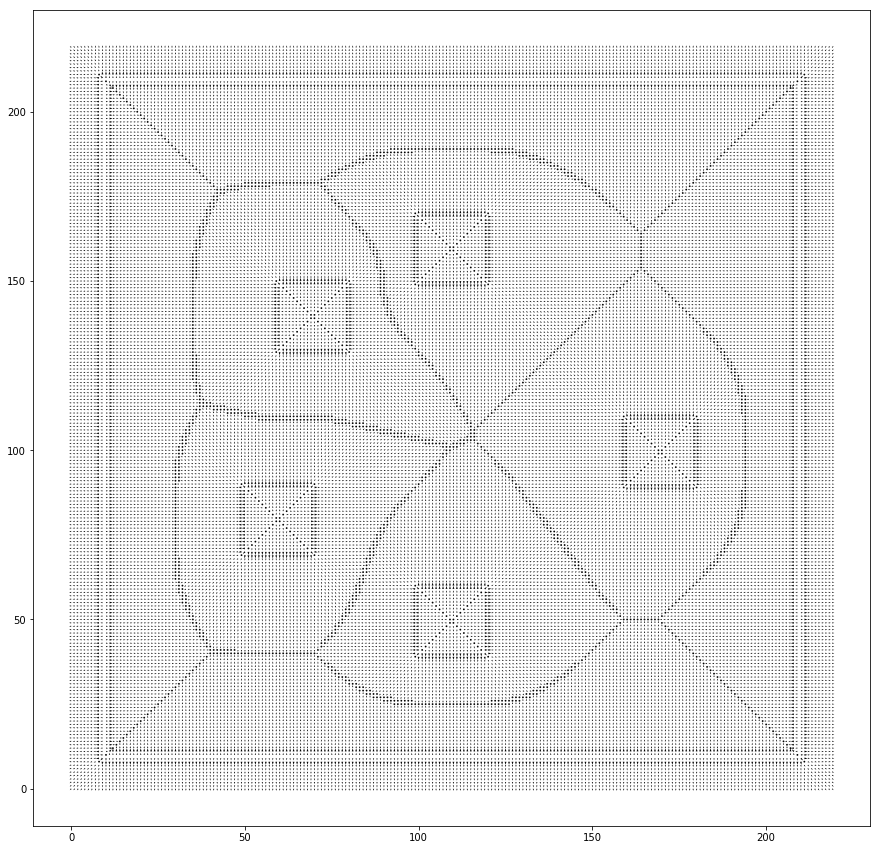

In [40]:
lim = N 
t = np.arange(lim)
plt.figure(figsize=(15,15))
plt.quiver(t, t, gradient[:lim,:lim,1], gradient[:lim,:lim,0])